In [155]:
from ReadFromDB import create_station_dictionary as csd
from ReadFromDB import station_dict_row as sdr
from ReadFromDB import read_weather as rw
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline

In [156]:
station = csd(2)[2]
weather = rw(2)

In [157]:
time_sec = station.last_updated/1000
day = list(np.zeros(len(time_sec)))
hour = list(np.zeros(len(time_sec)))
minute = list(np.zeros(len(time_sec)))
second = list(np.zeros(len(time_sec)))
date = list(np.zeros(len(time_sec)))
for i in range(len(time_sec)):
    date[i] = datetime.fromtimestamp(time_sec[i]).strftime("%x")
    day[i] = datetime.fromtimestamp(time_sec[i]).strftime("%a")
    hour[i] = int(datetime.fromtimestamp(time_sec[i]).strftime("%H"))
    minute[i] = int(datetime.fromtimestamp(time_sec[i]).strftime("%M"))
    second[i] = int(datetime.fromtimestamp(time_sec[i]).strftime("%S"))

In [158]:
first_half = []
second_half = []

for m in minute:
    if m<30:
        first_half.append(True)
        second_half.append(False)
    else:
        first_half.append(False)
        second_half.append(True)

Text(0, 0.5, 'Available Bikes')

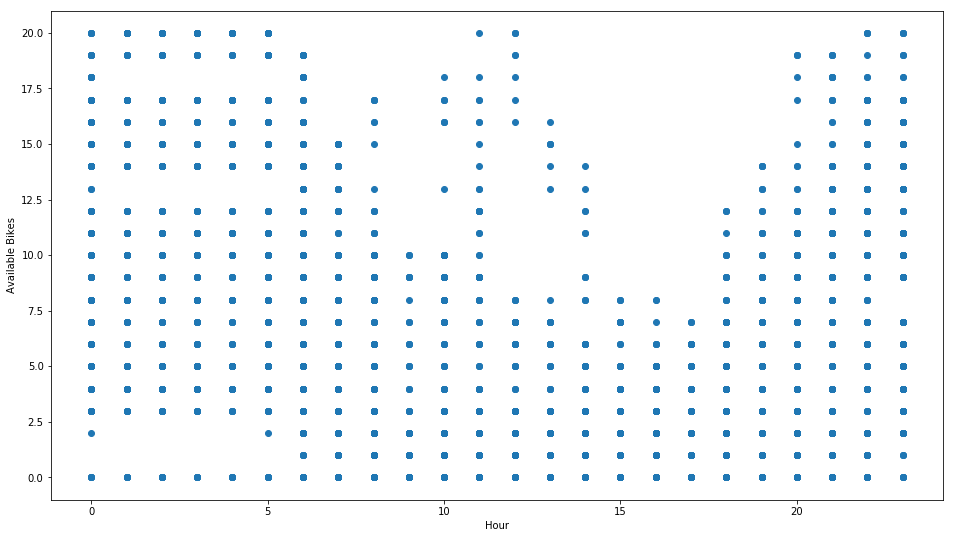

In [159]:
plt.figure(figsize=(16,9))
plt.scatter(hour, station.available_bikes)
plt.xlabel("Hour")
plt.ylabel("Available Bikes")

Text(0, 0.5, 'Available Bike Stands')

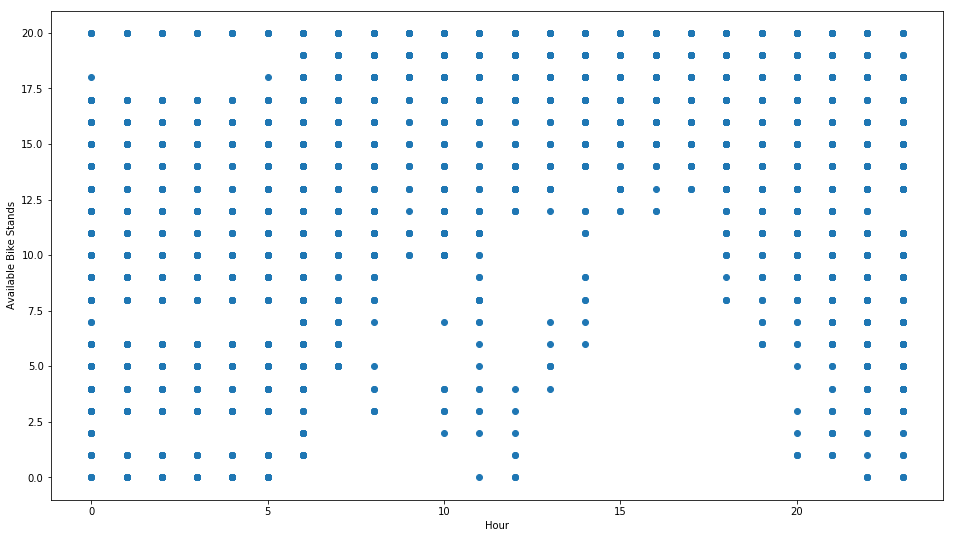

In [160]:
plt.figure(figsize=(16,9))
plt.scatter(hour, station.available_bike_stands)
plt.xlabel("Hour")
plt.ylabel("Available Bike Stands")

In [161]:
weather_times = weather.time
weather_date = list(np.zeros(len(weather_times)))
weather_day = list(np.zeros(len(weather_times)))
weather_hour = list(np.zeros(len(weather_times)))
weather_minute = list(np.zeros(len(weather_times)))
weather_second = list(np.zeros(len(weather_times)))
for i in range(len(weather_times)):
    weather_date[i] = datetime.fromtimestamp(weather_times[i]).strftime("%x")
    weather_day[i] = datetime.fromtimestamp(weather_times[i]).strftime("%a")
    weather_hour[i] = int(datetime.fromtimestamp(weather_times[i]).strftime("%H"))
    weather_minute[i] = int(datetime.fromtimestamp(weather_times[i]).strftime("%M"))
    weather_second[i] = int(datetime.fromtimestamp(weather_times[i]).strftime("%S"))

In [162]:
weather_first_half = []
weather_second_half = []

for m in weather_minute:
    if m<30:
        weather_first_half.append(True)
        weather_second_half.append(False)
    else:
        weather_first_half.append(False)
        weather_second_half.append(True)

In [163]:
weather_date

['02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',
 '02/25/19',

In [164]:
weather_data = [weather_date, 
        weather_day, 
        weather_hour, 
        weather_minute, 
        weather_second, 
        weather_first_half, 
        weather_second_half]

weather_time_df = pd.DataFrame(np.transpose(weather_data),
                              columns=['date',
                                      'day',
                                      'hour',
                                      'minute',
                                      'second',
                                      'first_half_hour',
                                      'second_half_hour'])

In [165]:
weather_time_df

,date,day,hour,minute,second,first_half_hour,second_half_hour
0,02/25/19,Mon,11,46,10,False,True
1,02/25/19,Mon,11,50,25,False,True
2,02/25/19,Mon,16,31,43,False,True
3,02/25/19,Mon,16,33,57,False,True
4,02/25/19,Mon,16,34,7,False,True
5,02/25/19,Mon,16,34,16,False,True
6,02/25/19,Mon,16,39,16,False,True
7,02/25/19,Mon,16,44,16,False,True
8,02/25/19,Mon,16,49,16,False,True
9,02/25/19,Mon,16,54,16,False,True


In [166]:
station_data = [date, day, hour, minute, second, first_half, second_half]
station_time_df = pd.DataFrame(np.transpose(station_data),
                              columns=['date',
                                      'day',
                                      'hour',
                                      'minute',
                                      'second',
                                      'first_half_hour',
                                      'second_half_hour'])

In [178]:
for i, row in station_time_df.iterrows():
    if (row.date==weather_time_df.date[0]):
        print(i)
        break

939
